# Machine Learning Modelling

## Hotel Booking - Price Prediction

### Import Libraries

In [24]:
## General
import math
import numpy as np
import pandas as pd

## EDA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
colour_palette = sns.color_palette("hls", 8)

## Machine Learning
# Pre-Processing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler      # Remove Mean and scale to Unit Variance
from sklearn.preprocessing import PowerTransformer    # Log Transformation
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVR
import lightgbm as ltb
import xgboost as xgb
import catboost as cb

### Import Dataset

In [2]:
## Importing Data
data_hotel_bookings = pd.read_csv('../../Dataset/hotel_booking/hotel_bookings.csv')

## Understanding Data I
data_hotel_bookings.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [3]:
## Understanding Data II
print(data_hotel_bookings.dtypes)

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [4]:
## Understanding Data III
data_hotel_bookings

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


### Pre-Processing

In [5]:
## Check Missing Data
data_hotel_bookings.isnull().sum()[data_hotel_bookings.isnull().sum() > 0]

children         4
country        488
agent        16340
company     112593
dtype: int64

In [6]:
## Fill Missing Data

# For Children
data_hotel_bookings.children.fillna(0, inplace = True)

# For Country
data_hotel_bookings.country.fillna("Unknown", inplace = True)

# For Agent
data_hotel_bookings.loc[data_hotel_bookings.agent.isnull() == False, 'agent'] = 'Agent'
data_hotel_bookings.agent.fillna("No Agent", inplace = True)

# For Company 
data_hotel_bookings.loc[data_hotel_bookings.company.isnull() == False, 'company'] = 'Corporate'
data_hotel_bookings.company.fillna("No Company", inplace = True)

# Re-Confirm 
data_hotel_bookings.isnull().sum()[data_hotel_bookings.isnull().sum() > 0]

Series([], dtype: int64)

In [7]:
## Changing Data Types
data_hotel_bookings['children'] = data_hotel_bookings['children'].astype('int') 

In [8]:
## Adjust to suit Streaming Data - Hotel Reservation
data_hotel_bookings.loc[(data_hotel_bookings['meal'] == 'Undefined'), 'meal']= 'SC'
data_hotel_bookings.loc[(data_hotel_bookings['required_car_parking_spaces'] > 1), 'required_car_parking_spaces']= 1

In [9]:
## Separating Data
data_hotel_bookings_resort = data_hotel_bookings.loc[data_hotel_bookings["hotel"] == "Resort Hotel"]
data_hotel_bookings_city = data_hotel_bookings.loc[data_hotel_bookings["hotel"] == "City Hotel"]

In [10]:
## Selecting Columns in both Hotel Booking & Hotel Reservation
data_hotel_bookings_city.drop(['hotel', 'arrival_date_week_number', 'babies', 'country', 'distribution_channel', 
                               'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 
                               'days_in_waiting_list', 'customer_type', 'reservation_status', 'reservation_status_date'], 
                              axis = 1, inplace = True)

print(data_hotel_bookings_city.dtypes)

is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int32
meal                               object
market_segment                     object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
dtype: object


C:\Users\KMwong\AppData\Local\Temp\ipykernel_4680\396154419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hotel_bookings_city.drop(['hotel', 'arrival_date_week_number', 'babies', 'country', 'distribution_channel',


### Feature Engineering

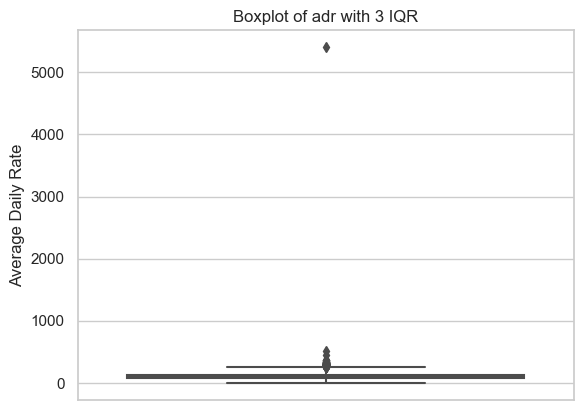

In [11]:
# Outlier Analysis for adr
adr_box = sns.boxplot(y = data_hotel_bookings_city["adr"], whis=3.0)
adr_box.set(ylabel = "Average Daily Rate",
                 title = "Boxplot of adr with 3 IQR")
plt.show()

C:\Users\KMwong\AppData\Local\Temp\ipykernel_4680\2875017712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hotel_bookings_city.drop(index = [row for row in data_hotel_bookings_city.index if 400 < data_hotel_bookings_city.loc[row, 'adr']], inplace = True)


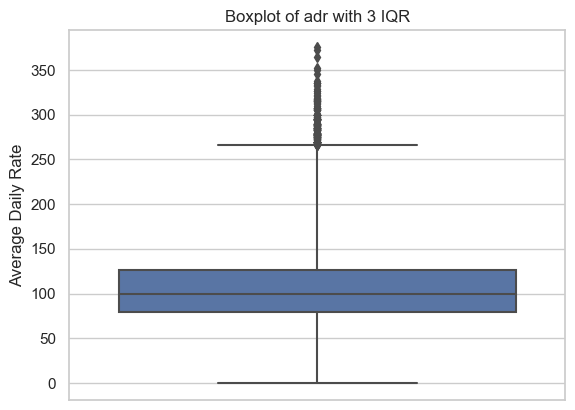

In [12]:
# Further Cleaning Data for adr
data_hotel_bookings_city.drop(index = [row for row in data_hotel_bookings_city.index if 400 < data_hotel_bookings_city.loc[row, 'adr']], inplace = True)

# Visualising Box Again
adr_cleaned_box = sns.boxplot(y = data_hotel_bookings_city["adr"], whis=3.0)
adr_cleaned_box.set(ylabel = "Average Daily Rate",
                 title = "Boxplot of adr with 3 IQR")
plt.show()

In [13]:
# Rounding adr to nearest integer and convert to int
data_hotel_bookings_city.adr = data_hotel_bookings_city.adr.round()
data_hotel_bookings_city.adr = data_hotel_bookings_city.adr.astype('int')
# print(data_hotel_bookings_city.adr)

C:\Users\KMwong\AppData\Local\Temp\ipykernel_4680\3460971230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hotel_bookings_city.adr = data_hotel_bookings_city.adr.round()
C:\Users\KMwong\AppData\Local\Temp\ipykernel_4680\3460971230.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hotel_bookings_city.adr = data_hotel_bookings_city.adr.astype('int')


In [14]:
## Encoding

# OneHotEncoder (Run Once only)

# # perform one-hot encoding for the customer_type column
# customer_type_one_hot = pd.get_dummies(data_hotel_bookings['customer_type'], prefix='customer_type')
# # concatenate the one-hot encoded columns to the original dataset
# data_hotel_bookings = pd.concat([data_hotel_bookings, customer_type_one_hot], axis=1)
# # drop the original customer_type column
# data_hotel_bookings.drop('customer_type', axis=1, inplace=True)

# # perform one-hot encoding for the distribution_channel column
# distribution_channel_one_hot = pd.get_dummies(data_hotel_bookings['distribution_channel'], prefix='distribution_channel')
# # concatenate the one-hot encoded columns to the original dataset
# data_hotel_bookings = pd.concat([data_hotel_bookings, distribution_channel_one_hot], axis=1)
# # drop the original customer_type column
# data_hotel_bookings.drop('distribution_channel', axis=1, inplace=True)

# perform one-hot encoding for the market_segment column
market_segment_one_hot = pd.get_dummies(data_hotel_bookings_city['market_segment'], prefix='market_segment')
# concatenate the one-hot encoded columns to the original dataset
data_hotel_bookings_city = pd.concat([data_hotel_bookings_city, market_segment_one_hot], axis=1)
# drop the original customer_type column
data_hotel_bookings_city.drop('market_segment', axis=1, inplace=True)

# perform one-hot encoding for the arrival_date_month column
arrival_date_month_one_hot = pd.get_dummies(data_hotel_bookings_city['arrival_date_month'], prefix='arrival_date_month')
# concatenate the one-hot encoded columns to the original dataset
data_hotel_bookings_city = pd.concat([data_hotel_bookings_city, arrival_date_month_one_hot], axis=1)
# drop the original arrival_date_month column
data_hotel_bookings_city.drop('arrival_date_month', axis=1, inplace=True)

# perform one-hot encoding for the meal column
meal_one_hot = pd.get_dummies(data_hotel_bookings_city['meal'], prefix='meal')
# concatenate the one-hot encoded columns to the original dataset
data_hotel_bookings_city = pd.concat([data_hotel_bookings_city, meal_one_hot], axis=1)
# drop the original meal column
data_hotel_bookings_city.drop('meal', axis=1, inplace=True)

# perform one-hot encoding for the reserved_room_type column
reserved_room_type_one_hot = pd.get_dummies(data_hotel_bookings_city['reserved_room_type'], prefix='reserved_room_type')
# concatenate the one-hot encoded columns to the original dataset
data_hotel_bookings_city = pd.concat([data_hotel_bookings_city, reserved_room_type_one_hot], axis=1)
# drop the original reserved_room_type column
data_hotel_bookings_city.drop('reserved_room_type', axis=1, inplace=True)


# LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# # apply LabelEncoder to the reservation_status column ('Canceled': -1, 'No-Show': 0, 'Check-Out': 1)
# mapping_rs = {'Canceled': -1, 'No-Show': 0, 'Check-Out': 1}
# data_hotel_bookings['reservation_status'] = data_hotel_bookings['reservation_status'].map(mapping_rs)
# data_hotel_bookings['reservation_status'] = le.fit_transform(data_hotel_bookings['reservation_status'])
# data_hotel_bookings['reservation_status'] = data_hotel_bookings['reservation_status'].map(dict(zip(range(3), mapping_rs.values())))

# # apply LabelEncoder to the deposit_type column ('Non-Refund': -1, 'No Deposit': 0, 'Refundable': 1)
# mapping_dt = {'Non Refund': -1, 'No Deposit': 0, 'Refundable': 1}
# data_hotel_bookings['deposit_type'] = data_hotel_bookings['deposit_type'].map(mapping_dt)
# data_hotel_bookings['deposit_type'] = le.fit_transform(data_hotel_bookings['deposit_type'])
# data_hotel_bookings['deposit_type'] = data_hotel_bookings['deposit_type'].map(dict(zip(range(3), mapping_dt.values())))

# print the result
data_hotel_bookings_city

,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,is_repeated_guest,previous_cancellations,...,meal_HB,meal_SC,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_P
40060,0,6,2015,1,0,2,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
40061,1,88,2015,1,0,4,2,0,0,0,...,0,0,1,0,0,0,0,0,0,0
40062,1,65,2015,1,0,4,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
40063,1,92,2015,1,2,4,2,0,0,0,...,0,0,1,0,0,0,0,0,0,0
40064,1,100,2015,2,0,2,2,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,30,2,5,2,0,0,0,...,0,0,1,0,0,0,0,0,0,0
119386,0,102,2017,31,2,5,3,0,0,0,...,0,0,0,0,0,0,1,0,0,0
119387,0,34,2017,31,2,5,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
119388,0,109,2017,31,2,5,2,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [90]:
## Only Run This For Classification Models (Not Regression Models)
# Create categories for the adr column (1: 0-50 dollars, 2: 51-100 dollars, ..., 350-400 dollars)
bins = [-1, 50, 100, 150, 200, 250, 300, 350, 400]
labels = [1, 2, 3, 4, 5, 6, 7, 8]
data_hotel_bookings_city['adr_category'] = pd.cut(data_hotel_bookings_city['adr'], bins=bins, labels=labels)

# print the result
data_hotel_bookings_city[['adr', 'adr_category']].max()


# # create categories for the days_in_waiting_list column (1: 0-10days, 2: 11-20days, 3: 21-30days...)
# bins = [-1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]
# labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
# data_hotel_bookings['days_in_waiting_list_category'] = pd.cut(data_hotel_bookings['days_in_waiting_list'], bins=bins, labels=labels)

# # print the result
# data_hotel_bookings[['days_in_waiting_list', 'days_in_waiting_list_category']].max()

adr             376
adr_category      8
dtype: int64

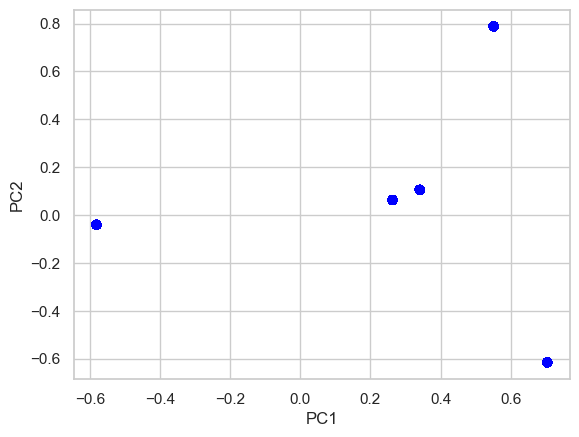

Explained variance ratios: [0.31705687 0.24760243 0.22107865 0.20000672 0.01425533]


In [15]:
## Principal Component Analysis (PCA)

# # Select variables for PCA
# X = data_hotel_bookings[['distribution_channel_Corporate', 'distribution_channel_Direct', 'distribution_channel_GDS', 'distribution_channel_TA/TO', 'distribution_channel_Undefined']]

# # Add cancellation status as target variable
# y = data_hotel_bookings['is_canceled']

# # Perform PCA
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X)

# # Create scatter plot of first two principal components
# colors = ['red' if x == 1 else 'blue' for x in y]
# plt.scatter(X_pca[:,0], X_pca[:,1], c=colors)
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.show()


# # Select variables for PCA
# X = data_hotel_bookings[['customer_type_Transient', 'customer_type_Transient-Party', 'customer_type_Group', 'customer_type_Contract']]

# # Add cancellation status as target variable
# y = data_hotel_bookings['is_canceled']

# # Perform PCA
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X)

# # Create scatter plot of first two principal components
# colors = ['red' if x == 1 else 'blue' for x in y]
# plt.scatter(X_pca[:,0], X_pca[:,1], c=colors)
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.show()


# Select variables for PCA
X = data_hotel_bookings_city[['market_segment_Direct', 'market_segment_Groups', 'market_segment_Offline TA/TO', 'market_segment_Online TA', 'market_segment_Undefined']]

# Add adr as target variable
y = data_hotel_bookings_city['adr']

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create scatter plot of first two principal components
colors = ['red' if x == 1 else 'blue' for x in y]
plt.scatter(X_pca[:,0], X_pca[:,1], c=colors)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


X = StandardScaler().fit_transform(X)

pca = PCA()
principalComponents = pca.fit_transform(X)

explained_var = pca.explained_variance_ratio_
print("Explained variance ratios:", explained_var)

In [16]:
## Correlation Matrix
data_hotel_bookings_city.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,is_repeated_guest,previous_cancellations,...,meal_HB,meal_SC,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_P
is_canceled,1.000000,0.309247,-0.002991,-0.004337,-0.007336,0.048700,0.053037,-0.027038,-0.065842,0.166645,...,-0.022561,-0.033488,0.070721,-0.021121,-0.001620,-0.054910,-0.026323,-0.008146,-0.027235,0.013269
lead_time,0.309247,1.000000,0.027888,0.014508,-0.023931,0.058343,0.115778,-0.053551,-0.107905,0.122507,...,0.135325,-0.138317,0.143616,0.004103,-0.004605,-0.114104,-0.057592,-0.048003,-0.041416,-0.011106
arrival_date_year,-0.002991,0.027888,1.000000,-0.002890,0.034863,0.066243,0.067587,0.055584,-0.028660,-0.195256,...,-0.104298,0.153941,-0.126241,-0.036347,-0.007384,0.111852,0.072187,0.024986,0.030017,0.006837
arrival_date_day_of_month,-0.004337,0.014508,-0.002890,1.000000,0.000302,-0.011693,-0.001384,0.012730,-0.011976,-0.010887,...,0.006905,-0.012143,-0.019372,0.008590,0.003261,0.012375,0.006533,0.010622,0.000712,-0.007830
stays_in_weekend_nights,-0.007336,-0.023931,0.034863,0.000302,1.000000,0.219590,0.082116,0.037511,-0.080498,-0.038618,...,-0.011535,0.004632,-0.084526,0.022426,-0.006576,0.073095,0.018805,0.017719,0.009900,-0.005014
stays_in_week_nights,0.048700,0.058343,0.066243,-0.011693,0.219590,1.000000,0.088244,0.037170,-0.094171,-0.050596,...,-0.032706,-0.023775,-0.117038,0.021098,-0.003624,0.102042,0.034434,0.020990,0.016053,-0.008350
adults,0.053037,0.115778,0.067587,-0.001384,0.082116,0.088244,1.000000,-0.005869,-0.167359,-0.038088,...,0.031703,0.001254,-0.259220,-0.066200,-0.009156,0.263830,0.061707,0.045969,0.063929,-0.040809
children,-0.027038,-0.053551,0.055584,0.012730,0.037511,0.037170,-0.005869,1.000000,-0.028865,-0.043773,...,-0.004119,-0.078267,-0.278374,0.147960,0.001839,-0.058799,0.065122,0.624034,0.196979,-0.002756
is_repeated_guest,-0.065842,-0.107905,-0.028660,-0.011976,-0.080498,-0.094171,-0.167359,-0.028865,1.000000,0.268286,...,-0.034640,-0.038892,0.023988,-0.010548,0.009860,-0.026813,0.003598,-0.007991,0.020085,-0.001821
previous_cancellations,0.166645,0.122507,-0.195256,-0.010887,-0.038618,-0.050596,-0.038088,-0.043773,0.268286,1.000000,...,0.008376,-0.065140,0.071726,-0.008742,0.002018,-0.062949,-0.016598,-0.023044,-0.001791,-0.002155


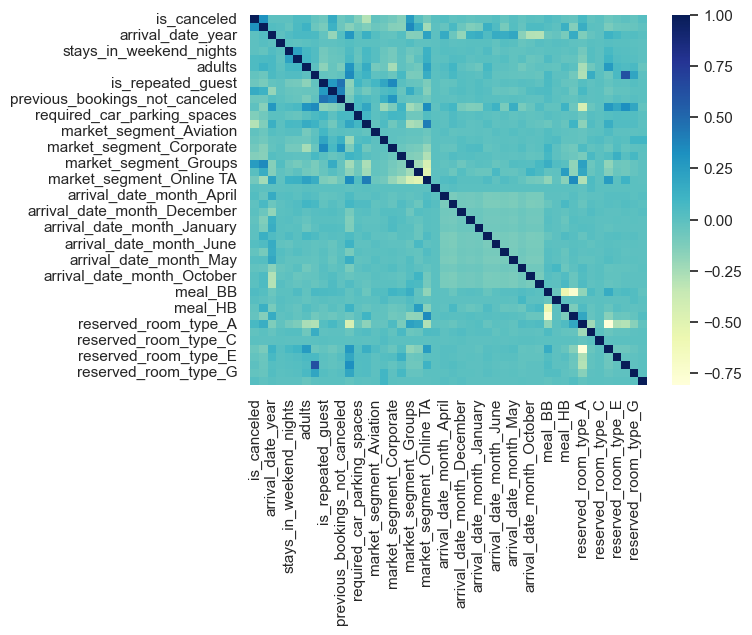

In [17]:
## Correlation Matrix Heatmap
sns.heatmap(data_hotel_bookings_city.corr(), cmap='YlGnBu') #, annot = True, annot_kws={"size":5})
plt.show()

In [18]:
## Feature Importance
corr_adr = data_hotel_bookings_city.corr()["adr"]
corr_adr.abs().sort_values(ascending = False)

adr                               1.000000
reserved_room_type_A              0.446311
children                          0.346095
market_segment_Online TA          0.340132
reserved_room_type_F              0.325016
adults                            0.291322
reserved_room_type_D              0.278460
arrival_date_year                 0.276213
market_segment_Groups             0.238775
market_segment_Complementary      0.216619
total_of_special_requests         0.194799
reserved_room_type_G              0.192548
reserved_room_type_E              0.184683
is_repeated_guest                 0.169052
market_segment_Offline TA/TO      0.165011
lead_time                         0.150847
previous_cancellations            0.142926
arrival_date_month_May            0.141737
arrival_date_month_February       0.132407
arrival_date_month_January        0.127767
arrival_date_month_June           0.117131
meal_HB                           0.112028
market_segment_Corporate          0.111250
arrival_dat

In [19]:
## Selecting Features for Model Building
data_hotel_bookings_city_feature = data_hotel_bookings_city
data_hotel_bookings_city_feature.drop(index = [row for row in data_hotel_bookings_city_feature.index 
                                               if 0 >= data_hotel_bookings_city_feature.loc[row, 'adr']], 
                                      inplace = True)

data_hotel_bookings_city_feature.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,is_repeated_guest,previous_cancellations,...,meal_HB,meal_SC,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_P
40061,1,88,2015,1,0,4,2,0,0,0,...,0,0,1,0,0,0,0,0,0,0
40062,1,65,2015,1,0,4,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
40063,1,92,2015,1,2,4,2,0,0,0,...,0,0,1,0,0,0,0,0,0,0
40064,1,100,2015,2,0,2,2,0,0,0,...,0,0,1,0,0,0,0,0,0,0
40065,1,79,2015,2,0,3,2,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Time Series Forecasting

<AxesSubplot:xlabel='arrival_date_year'>

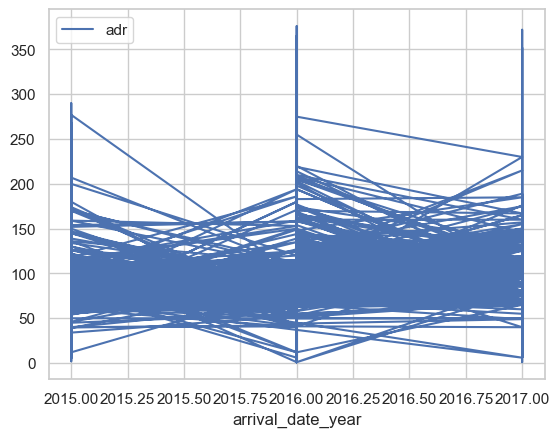

In [20]:
# Simple TS
data_hotel_bookings_city_ts = data_hotel_bookings_city_feature[['adr', 'arrival_date_year']]
# data_hotel_bookings_city_ts['arrival_date_year'] = pd.to_datetime(data_hotel_bookings_city_ts['arrival_date_year'])
data_hotel_bookings_city_ts.set_index('arrival_date_year', inplace = True)
data_hotel_bookings_city_ts.plot()

### Model Selection

In [21]:
## Splitting Data (80:20)
x = data_hotel_bookings_city_feature.drop(columns = 'adr')
y = data_hotel_bookings_city_feature.adr 

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((62494, 45), (15624, 45))

#### Regression Models

In [25]:
## Model : Linear Regression
# Finding linear relationship among more than two quantitative variables

lnr = LinearRegression()
lnr_model = lnr.fit(x_train, y_train)
lnr_y_pred = lnr_model.predict(x_test)

# Print Coefficients
print(f"Mean Squared Error: {mean_squared_error(y_test, lnr_y_pred)}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, lnr_y_pred))}")
print(f"R2 Score: {r2_score(y_test, lnr_y_pred)}")

# # Plot Output
# plt.scatter(x_test, y_test, color="black")
# plt.plot(x_test, lnr_y_pred, color="blue", linewidth=3)
# plt.xticks(())
# plt.yticks(())
# plt.show()

Mean Squared Error: 510.95775563291824
RMSE: 22.60437470121477
R2 Score: 0.6391479483212722


In [26]:
## Model : Random Forest Regressor
# Meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to 
# improve the predictive accuracy and control over-fitting

rfr = RandomForestRegressor()
rfr_model = rfr.fit(x_train, y_train)
rfr_y_pred = rfr_model.predict(x_test)

# Print Coefficients
print(f"Mean Squared Error: {mean_squared_error(y_test, rfr_y_pred)}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, rfr_y_pred))}")
print(f"R2 Score: {r2_score(y_test, rfr_y_pred)}")

Mean Squared Error: 191.78376118335626
RMSE: 13.848601416148718
R2 Score: 0.8645571714320042


In [27]:
## Model : Gradient Boosting Regressor
# Builds an additive model in a forward stage-wise fashion for the optimization of arbitrary differentiable loss functions. 
# In each stage a regression tree is fit on the negative gradient of the given loss function.

gbr = GradientBoostingRegressor()
gbr_model = gbr.fit(x_train, y_train)
gbr_y_pred = gbr_model.predict(x_test)

# Print Coefficients
print(f"Mean Squared Error: {mean_squared_error(y_test, gbr_y_pred)}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, gbr_y_pred))}")
print(f"R2 Score: {r2_score(y_test, gbr_y_pred)}")

Mean Squared Error: 431.2444153211146
RMSE: 20.766425193593495
R2 Score: 0.6954436441602528


In [28]:
## Model : Stochastic Gradient Descent Regressor
# Gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength 
# schedule (aka learning rate).

sgdr = SGDRegressor()
sgdr_model = sgdr.fit(x_train, y_train)
sgdr_y_pred = sgdr_model.predict(x_test)

# Print Coefficients
print(f"Mean Squared Error: {mean_squared_error(y_test, sgdr_y_pred)}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, sgdr_y_pred))}")
print(f"R2 Score: {r2_score(y_test, sgdr_y_pred)}")

Mean Squared Error: 2.7488334797246276e+29
RMSE: 524293188943421.94
R2 Score: -1.9412998236089488e+26


In [29]:
## Model : Elastic Net
# Linear regression with combined L1 and L2 priors as regularizer

en = ElasticNet()
en_model = en.fit(x_train, y_train)
en_y_pred = en_model.predict(x_test)

# Print Coefficients
print(f"Mean Squared Error: {mean_squared_error(y_test, en_y_pred)}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, en_y_pred))}")
print(f"R2 Score: {r2_score(y_test, en_y_pred)}")

Mean Squared Error: 994.9448139150054
RMSE: 31.54274582079064
R2 Score: 0.29734332545042685


In [30]:
## Model : Bayesian Ridge
# Allows a natural mechanism to survive insufficient data or poorly distributed data by formulating linear regression using 
# probability distributors rather than point estimates. 
# The output or response 'y' is assumed to drawn from a probability distribution rather than estimated as a single value.

br = BayesianRidge()
br_model = br.fit(x_train, y_train)
br_y_pred = br_model.predict(x_test)

# Print Coefficients
print(f"Mean Squared Error: {mean_squared_error(y_test, br_y_pred)}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, br_y_pred))}")
print(f"R2 Score: {r2_score(y_test, br_y_pred)}")

Mean Squared Error: 510.9294053312332
RMSE: 22.60374759483996
R2 Score: 0.6391679700636099


In [31]:
## Model : LGBM Regressor
# LightGBM grows tree vertically while other tree based learning algorithms grow trees horizontally. 
# It means that LightGBM grows tree leaf-wise while other algorithms grow level-wise. It will choose the leaf with max delta 
# loss to grow. When growing the same leaf, leaf-wise algorithm can reduce more loss than a level-wise algorithm.

lgbmr = ltb.LGBMRegressor()
lgbmr_model = lgbmr.fit(x_train, y_train)
lgbmr_y_pred = lgbmr_model.predict(x_test)

# Print Coefficients
print(f"Mean Squared Error: {mean_squared_error(y_test, lgbmr_y_pred)}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, lgbmr_y_pred))}")
print(f"R2 Score: {r2_score(y_test, lgbmr_y_pred)}")

Mean Squared Error: 276.03260232927744
RMSE: 16.614228911667176
R2 Score: 0.8050583834325873


In [32]:
## Model : XGBoost Regressor
# Efficient implementation of gradient boosting that can be used for regression predictive modeling

xgbr = xgb.XGBRegressor()
xgbr_model = xgbr.fit(x_train, y_train)
xgbr_y_pred = xgbr_model.predict(x_test)

# Print Coefficients
print(f"Mean Squared Error: {mean_squared_error(y_test, xgbr_y_pred)}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, xgbr_y_pred))}")
print(f"R2 Score: {r2_score(y_test, xgbr_y_pred)}")

Mean Squared Error: 225.52254951763197
RMSE: 15.017408215721911
R2 Score: 0.8407299355062141


In [33]:
## Model : CatBoost Regressor
# builds upon the theory of decision trees and gradient boosting. 
# The main idea of boosting is to sequentially combine many weak models (a model performing slightly better than random chance) 
# and thus through greedy search create a strong competitive predictive model

cbr = cb.CatBoostRegressor()
cbr_model = cbr.fit(x_train, y_train)
cbr_y_pred = cbr_model.predict(x_test)

# Print Coefficients
print(f"Mean Squared Error: {mean_squared_error(y_test, cbr_y_pred)}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, cbr_y_pred))}")
print(f"R2 Score: {r2_score(y_test, cbr_y_pred)}")

Learning rate set to 0.07869
0:	learn: 36.0663898	total: 154ms	remaining: 2m 33s
1:	learn: 35.0142662	total: 171ms	remaining: 1m 25s
2:	learn: 34.0586866	total: 200ms	remaining: 1m 6s
3:	learn: 33.1625726	total: 216ms	remaining: 53.9s
4:	learn: 32.3878644	total: 230ms	remaining: 45.8s
5:	learn: 31.7032284	total: 240ms	remaining: 39.8s
6:	learn: 31.0863823	total: 250ms	remaining: 35.5s
7:	learn: 30.4661845	total: 259ms	remaining: 32.1s
8:	learn: 29.9658636	total: 268ms	remaining: 29.5s
9:	learn: 29.4313890	total: 275ms	remaining: 27.2s
10:	learn: 28.9932960	total: 284ms	remaining: 25.5s
11:	learn: 28.5633698	total: 292ms	remaining: 24s
12:	learn: 28.1705307	total: 301ms	remaining: 22.9s
13:	learn: 27.8221527	total: 308ms	remaining: 21.7s
14:	learn: 27.4721710	total: 315ms	remaining: 20.7s
15:	learn: 27.1853884	total: 321ms	remaining: 19.8s
16:	learn: 26.8749066	total: 326ms	remaining: 18.9s
17:	learn: 26.5971311	total: 332ms	remaining: 18.1s
18:	learn: 26.2745053	total: 337ms	remaining:

163:	learn: 17.8395724	total: 1.24s	remaining: 6.32s
164:	learn: 17.8158418	total: 1.25s	remaining: 6.31s
165:	learn: 17.8025407	total: 1.25s	remaining: 6.3s
166:	learn: 17.7842171	total: 1.26s	remaining: 6.3s
167:	learn: 17.7757560	total: 1.27s	remaining: 6.28s
168:	learn: 17.7680948	total: 1.27s	remaining: 6.27s
169:	learn: 17.7518821	total: 1.28s	remaining: 6.25s
170:	learn: 17.7336188	total: 1.29s	remaining: 6.24s
171:	learn: 17.7197304	total: 1.29s	remaining: 6.22s
172:	learn: 17.7032337	total: 1.3s	remaining: 6.21s
173:	learn: 17.6811455	total: 1.3s	remaining: 6.2s
174:	learn: 17.6631923	total: 1.31s	remaining: 6.18s
175:	learn: 17.6520778	total: 1.32s	remaining: 6.17s
176:	learn: 17.6355631	total: 1.32s	remaining: 6.15s
177:	learn: 17.6283431	total: 1.33s	remaining: 6.14s
178:	learn: 17.6039788	total: 1.33s	remaining: 6.12s
179:	learn: 17.5834750	total: 1.34s	remaining: 6.11s
180:	learn: 17.5748659	total: 1.35s	remaining: 6.1s
181:	learn: 17.5635247	total: 1.35s	remaining: 6.08s

342:	learn: 16.2694697	total: 2.26s	remaining: 4.33s
343:	learn: 16.2646975	total: 2.27s	remaining: 4.32s
344:	learn: 16.2635677	total: 2.27s	remaining: 4.31s
345:	learn: 16.2565521	total: 2.28s	remaining: 4.3s
346:	learn: 16.2464213	total: 2.28s	remaining: 4.3s
347:	learn: 16.2415568	total: 2.29s	remaining: 4.29s
348:	learn: 16.2404937	total: 2.29s	remaining: 4.28s
349:	learn: 16.2312036	total: 2.3s	remaining: 4.27s
350:	learn: 16.2282925	total: 2.31s	remaining: 4.26s
351:	learn: 16.2247815	total: 2.31s	remaining: 4.25s
352:	learn: 16.2224569	total: 2.32s	remaining: 4.25s
353:	learn: 16.2148180	total: 2.32s	remaining: 4.24s
354:	learn: 16.2091005	total: 2.33s	remaining: 4.23s
355:	learn: 16.2058762	total: 2.33s	remaining: 4.22s
356:	learn: 16.2035972	total: 2.34s	remaining: 4.21s
357:	learn: 16.1871308	total: 2.34s	remaining: 4.2s
358:	learn: 16.1821294	total: 2.35s	remaining: 4.2s
359:	learn: 16.1760350	total: 2.35s	remaining: 4.19s
360:	learn: 16.1714800	total: 2.36s	remaining: 4.18

505:	learn: 15.4906913	total: 3.28s	remaining: 3.2s
506:	learn: 15.4864419	total: 3.28s	remaining: 3.19s
507:	learn: 15.4864083	total: 3.29s	remaining: 3.18s
508:	learn: 15.4832297	total: 3.29s	remaining: 3.18s
509:	learn: 15.4818569	total: 3.3s	remaining: 3.17s
510:	learn: 15.4793577	total: 3.31s	remaining: 3.16s
511:	learn: 15.4760704	total: 3.31s	remaining: 3.16s
512:	learn: 15.4759933	total: 3.32s	remaining: 3.15s
513:	learn: 15.4728064	total: 3.32s	remaining: 3.14s
514:	learn: 15.4670388	total: 3.33s	remaining: 3.14s
515:	learn: 15.4595528	total: 3.34s	remaining: 3.13s
516:	learn: 15.4577506	total: 3.35s	remaining: 3.13s
517:	learn: 15.4558505	total: 3.35s	remaining: 3.12s
518:	learn: 15.4502150	total: 3.36s	remaining: 3.11s
519:	learn: 15.4469543	total: 3.36s	remaining: 3.11s
520:	learn: 15.4435547	total: 3.37s	remaining: 3.1s
521:	learn: 15.4413914	total: 3.38s	remaining: 3.09s
522:	learn: 15.4374863	total: 3.38s	remaining: 3.08s
523:	learn: 15.4313064	total: 3.39s	remaining: 3.

680:	learn: 14.8135870	total: 4.28s	remaining: 2.01s
681:	learn: 14.8116155	total: 4.29s	remaining: 2s
682:	learn: 14.8060849	total: 4.3s	remaining: 1.99s
683:	learn: 14.8039139	total: 4.3s	remaining: 1.99s
684:	learn: 14.8000003	total: 4.31s	remaining: 1.98s
685:	learn: 14.7972975	total: 4.32s	remaining: 1.98s
686:	learn: 14.7925500	total: 4.32s	remaining: 1.97s
687:	learn: 14.7891334	total: 4.33s	remaining: 1.96s
688:	learn: 14.7837558	total: 4.33s	remaining: 1.96s
689:	learn: 14.7821293	total: 4.34s	remaining: 1.95s
690:	learn: 14.7774068	total: 4.35s	remaining: 1.94s
691:	learn: 14.7741870	total: 4.35s	remaining: 1.94s
692:	learn: 14.7698715	total: 4.36s	remaining: 1.93s
693:	learn: 14.7660655	total: 4.36s	remaining: 1.92s
694:	learn: 14.7648979	total: 4.37s	remaining: 1.92s
695:	learn: 14.7647306	total: 4.37s	remaining: 1.91s
696:	learn: 14.7645720	total: 4.38s	remaining: 1.9s
697:	learn: 14.7643521	total: 4.38s	remaining: 1.9s
698:	learn: 14.7628347	total: 4.39s	remaining: 1.89s


838:	learn: 14.3747642	total: 5.32s	remaining: 1.02s
839:	learn: 14.3736734	total: 5.32s	remaining: 1.01s
840:	learn: 14.3715276	total: 5.33s	remaining: 1.01s
841:	learn: 14.3709118	total: 5.34s	remaining: 1s
842:	learn: 14.3676610	total: 5.35s	remaining: 996ms
843:	learn: 14.3671502	total: 5.35s	remaining: 989ms
844:	learn: 14.3648146	total: 5.36s	remaining: 983ms
845:	learn: 14.3637819	total: 5.36s	remaining: 976ms
846:	learn: 14.3582944	total: 5.37s	remaining: 970ms
847:	learn: 14.3558812	total: 5.38s	remaining: 964ms
848:	learn: 14.3526279	total: 5.38s	remaining: 958ms
849:	learn: 14.3472103	total: 5.39s	remaining: 951ms
850:	learn: 14.3438758	total: 5.4s	remaining: 945ms
851:	learn: 14.3405978	total: 5.4s	remaining: 938ms
852:	learn: 14.3395169	total: 5.41s	remaining: 932ms
853:	learn: 14.3373770	total: 5.41s	remaining: 926ms
854:	learn: 14.3354558	total: 5.42s	remaining: 919ms
855:	learn: 14.3329045	total: 5.42s	remaining: 913ms
856:	learn: 14.3311603	total: 5.43s	remaining: 906m

Mean Squared Error: 229.9944134471634
RMSE: 15.165566703791962
R2 Score: 0.8375717854321426


In [35]:
## Model : Support Vector Machine Regressor
# Used to predict discrete values
# Best fit line is the hyperplane that has the maximum number of points

svr = SVR()
svr_model = svr.fit(x_train, y_train)
svr_y_pred = svr_model.predict(x_test)

# Print Coefficients
print(f"Mean Squared Error: {mean_squared_error(y_test, svr_y_pred)}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, svr_y_pred))}")
print(f"R2 Score: {r2_score(y_test, svr_y_pred)}")

Mean Squared Error: 1405.9859242519217
RMSE: 37.49647882470995
R2 Score: 0.007055084682557777


Model Comparison

Ranking Models By R^2 (Coefficient of Determination)
1. 0.86456 Random Forest Regressor
2. 0.84073 XGBoost Regressor
3. 0.83757 CatBoost Regressor
4. 0.80506 LightGBM Regressor
5. 0.69544 Gradient Boosting Regressor
6. 0.63917 Bayesian Ridge
7. 0.63915 Linear Regression
8. 0.29734 Elastic Net
9. 0.00706 Support Vector Regressor
10. -1.9e+26 Stochastic Gradient Descent Regressor

#### Classification Models

In [95]:
## Model : Logistic Regression
# Linear relationship between the log-odds of binary variable and multiple quantitative variables

lgr = LogisticRegression()
lgr_model = lgr.fit(x_train, y_train)
lgr_y_pred = lgr_model.predict(x_test)

# Proportion of Correction Classification: (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy_score(y_test, lgr_y_pred)}")
# Proportion of Actual Yes out of Predicted Yes: (TP) / (TP + FP)
# print(f"Precision: {precision_score(y_test, lgr_y_pred)}")
# Proportion of Predicted Yes out of Actual Yes: (TP) / (TP + FN)
# print(f"Sensitivity/Recall: {recall_score(y_test, lgr_y_pred)}")
# Balanced Index Between Precision & Sensitivity: (2 * Precision * Sensitivity) / (Precision + Sensitivity)
# print(f"F1 Score: {f1_score(y_test, lgr_y_pred)}")

# print(f"Classification report: \n {classification_report(y_test, lgr_y_pred)}")
# ConfusionMatrixDisplay(confusion_matrix(y_test, lgr_y_pred)).plot()
# plt.title('Confusion Matrix For Given Prediction')
# plt.show()

Accuracy: 0.06765232974910394


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
## Model : Naive Bayes (using GNB Technique)
# Assumes each parameter (Feature) has an independent capacity of predicting output variable

gnb = GaussianNB()
gnb_model = gnb.fit(x_train, y_train)
gnb_y_pred = gnb_model.predict(x_test)

# Proportion of Correction Classification: (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy_score(y_test, gnb_y_pred)}")

Accuracy: 0.10343061955965181


In [54]:
## Model : Naive Bayes (using MNB Technique)
# Probabilistic learning method that is mostly used in Natural Language Processing (NLP). 
# The algorithm is based on the Bayes theorem and predicts the tag of a text such as a piece of email or newspaper article.

mnb = MultinomialNB()
mnb_model = mnb.fit(x_train, y_train)
mnb_y_pred = mnb_model.predict(x_test)

# Proportion of Correction Classification: (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy_score(y_test, mnb_y_pred)}")

Accuracy: 0.06394009216589862


In [55]:
## Model : K-Nearest Neighbours
# Learning based on the nearest neighbors of each query point, where k is an integer value specified by the user

knn = KNeighborsClassifier()
knn_model = knn.fit(x_train, y_train)
knn_y_pred = knn_model.predict(x_test)

# Proportion of Correction Classification: (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy_score(y_test, knn_y_pred)}")

C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.4176267281105991


In [56]:
## Model : Random Forest Classifier
# meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging 
# to improve the predictive accuracy and control over-fitting.
# Combines output of multiple decision trees to reach a single result

rf = RandomForestClassifier()
rf_model = rf.fit(x_train, y_train)
rf_y_pred = rf_model.predict(x_test)

# Proportion of Correction Classification: (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy_score(y_test, rf_y_pred)}")

Accuracy: 0.6522017409114184


In [57]:
## Model : Decision Tree Classifier 
# Non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks.
# Create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
# A tree can be seen as a piecewise constant approximation.

dt = DecisionTreeClassifier()
dt_model = dt.fit(x_train, y_train)
dt_y_pred = dt_model.predict(x_test)

# Proportion of Correction Classification: (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy_score(y_test, dt_y_pred)}")

Accuracy: 0.6197516641065028


In [58]:
## Model : Extra Trees 
# Meta estimator that fits a number of randomized decision trees and uses averaging to improve the predictive accuracy 
# and control over-fitting.

et = ExtraTreesClassifier()
et_model = et.fit(x_train, y_train)
et_y_pred = et_model.predict(x_test)

# Proportion of Correction Classification: (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy_score(y_test, et_y_pred)}")

Accuracy: 0.6363927291346646


In [59]:
## Model : Ada Boost
# Meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier 
# on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers 
# focus more on difficult cases.

ada = AdaBoostClassifier(base_estimator = dt)
ada_model = ada.fit(x_train, y_train)
ada_y_pred = ada_model.predict(x_test)

# Proportion of Correction Classification: (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy_score(y_test, ada_y_pred)}")

Accuracy: 0.6405529953917051


In [ ]:
## Model : LightGBM Classifier
# LightGBM grows tree vertically while other tree based learning algorithms grow trees horizontally. 
# It means that LightGBM grows tree leaf-wise while other algorithms grow level-wise. It will choose the leaf with max delta 
# loss to grow. When growing the same leaf, leaf-wise algorithm can reduce more loss than a level-wise algorithm.

lgbmc = ltb.LGBMClassifier()
lgbmc_model = lgbmc.fit(x_train, y_train)
lgbmc_y_pred = lgbmc_model.predict(x_test)

# Proportion of Correction Classification: (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy_score(y_test, lgbmc_y_pred)}")

In [ ]:
## Model : Stochastic Gradient Descent Classifier
# Optimization algorithm often used in machine learning applications to find the model parameters that correspond to the best 
# fit between predicted and actual outputs.
# Plain stochastic gradient descent learning routine which supports different loss functions and penalties for classification

sgd = SGDClassifier()
sgd_model = sgd.fit(x_train, y_train)
sgd_y_pred = sgd_model.predict(x_test)

# Proportion of Correction Classification: (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy_score(y_test, sgd_y_pred)}")

Model Comparison

Ranking Models By Accuracy
1. 0.65220 Random Forest Classifier
2. 0.64055 Ada Boost
3. 0.63639 Extra Trees Classifier
4. 0.61975 Decision Tree Classifier
5. 0.41763 KNN Classifier
6. 0.10343 Gaussian Naive-Bayes
7. 0.06746 Logistic Regression
8. 0.06394 Multinomial Naive-Bayes
9. 0.02906 LGBM Classifier
10. 0.00845 Stochastic Gradient Descent Classifier 